<a href="https://colab.research.google.com/github/Vijaypurushoth988373/DW12_task_6/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("/content/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
# Getting some Statistical Measure about the data
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [ ]:
# No of Rows and Columns in the Data Frame
df.shape

(52, 6)

In [ ]:
# Checking if there is any null values present or not
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
# Distribution of Target Variable
df['Sex'].value_counts()

0    38
1    14
Name: Sex, dtype: int64

There are **38** Males and **14** Females in the sex column.

In [ ]:
# Distribution of Target Variable
df['Rank'].value_counts()

3    20
1    18
2    14
Name: Rank, dtype: int64

There are **18** Assistant professor, **14** Associate professor and **20** Full Professor in the Rank columm.

In [ ]:
# Distribution of Target Variable
df['Year'].value_counts()

9     5
3     5
13    4
1     4
4     4
2     4
0     3
16    3
11    3
8     3
7     3
10    3
6     2
5     2
12    1
15    1
19    1
25    1
Name: Year, dtype: int64

These are the **work experience** in year column

In [ ]:
# Distribution of Target Variable
df['Degree'].value_counts()

1    34
0    18
Name: Degree, dtype: int64

There are **18** Master's and **34** Doctorate Degree in the Degree column

# Data Preprocessing

Seperating the Feature and Target Variables

In [ ]:
X=df.drop(columns='Salary',axis=1)
Y=df['Salary']

In [ ]:
print(X)

    Sex  Rank  Year  Degree  YSdeg
0     0     3    25       1     35
1     0     3    13       1     22
2     0     3    10       1     23
3     1     3     7       1     27
4     0     3    19       0     30
5     0     3    16       1     21
6     1     3     0       0     32
7     0     3    16       1     18
8     0     3    13       0     30
9     0     3    13       0     31
10    0     3    12       1     22
11    0     2    15       1     19
12    0     3     9       1     17
13    0     2     9       0     27
14    0     3     9       1     24
15    0     3     7       1     15
16    0     3    13       1     20
17    0     2    11       0     14
18    0     2    10       0     15
19    0     3     6       0     21
20    0     1    16       0     23
21    0     2     8       0     31
22    0     3     7       1     13
23    1     3     8       1     24
24    0     2     9       1     12
25    0     3     5       1     18
26    0     2    11       1     14
27    1     3     5 

In [ ]:
print(Y)

0     36350
1     35350
2     28200
3     26775
4     33696
5     28516
6     24900
7     31909
8     31850
9     32850
10    27025
11    24750
12    28200
13    23712
14    25748
15    29342
16    31114
17    24742
18    22906
19    24450
20    19175
21    20525
22    27959
23    38045
24    24832
25    25400
26    24800
27    25500
28    26182
29    23725
30    21600
31    23300
32    23713
33    20690
34    22450
35    20850
36    18304
37    17095
38    16700
39    17600
40    18075
41    18000
42    20999
43    17250
44    16500
45    16094
46    16150
47    15350
48    16244
49    16686
50    15000
51    20300
Name: Salary, dtype: int64


Plotting the Graph to find any correlaton

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

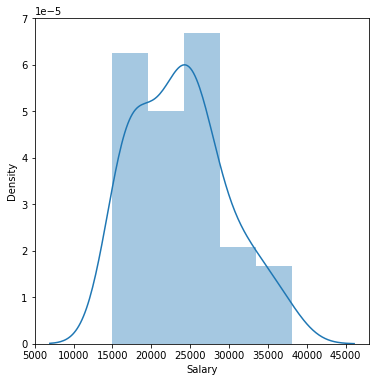

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.distplot(df['Salary'])
plt.show

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 2)

In [ ]:
print(X_train.shape, X_test.shape)

(41, 5) (11, 5)


In [ ]:
print(Y_train.shape, Y_test.shape)

(41,) (11,)


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred=model.predict(X_test)

In [ ]:
model.intercept_

12527.600342712582

In [ ]:
model.coef_

array([ 1046.76530473,  5766.27416903,   413.39521488, -2057.18314007,
        -187.35155466])

The **Linear Regression Equation** for this Data :

**Salary** = (1046.765 * Sex) + (5766.274 * Rank) + (413.395 * Year) + (-2057.183 * Degree) + (-187.351 * YSdeg) 

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,Y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.7011602686502274


# the selection of columns with the best  **R2**  score is **70.1 %**

In [ ]:
df.groupby('Sex')['Salary'].mean()

Sex
0    24696.789474
1    21357.142857
Name: Salary, dtype: float64

Based on the Mean. For this dataset, Sex Factor does not play Major Role in this dataset.